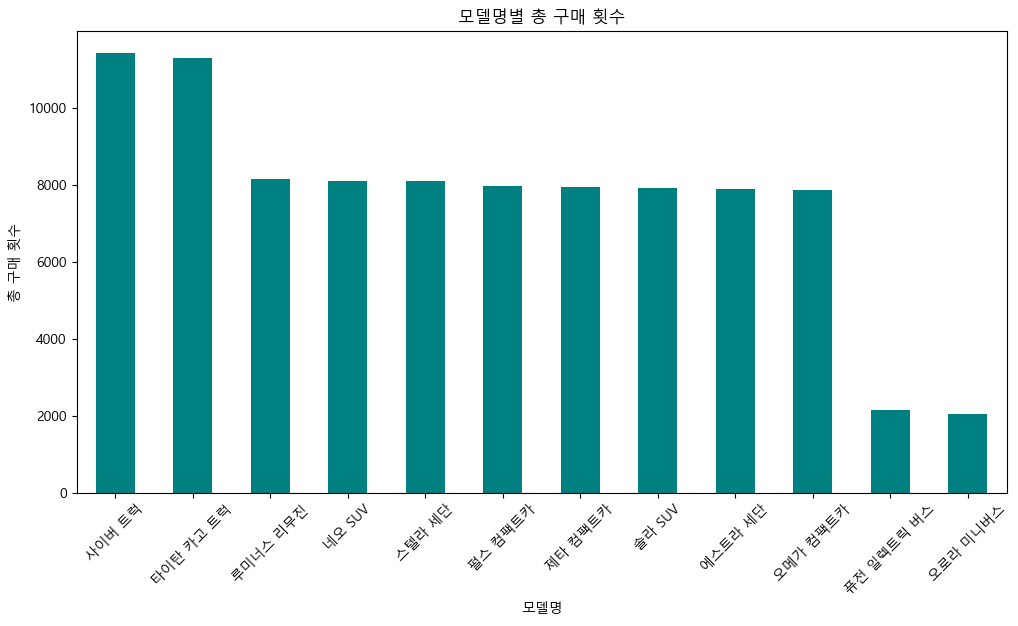

In [68]:
import matplotlib.pyplot as plt
import pandas as pd

# 데이터 로드
data = pd.read_csv('preprocessed_data.csv')

# 모델명별 총 구매 횟수 계산
model_purchase_counts = data.groupby('모델명')['구매 횟수'].sum()

# 막대그래프로 시각화
plt.figure(figsize=(12, 6))
model_purchase_counts.sort_values(ascending=False).plot(kind='bar', color='teal')
plt.xlabel('모델명')
plt.ylabel('총 구매 횟수')
plt.title('모델명별 총 구매 횟수')
plt.xticks(rotation=45)
plt.show()

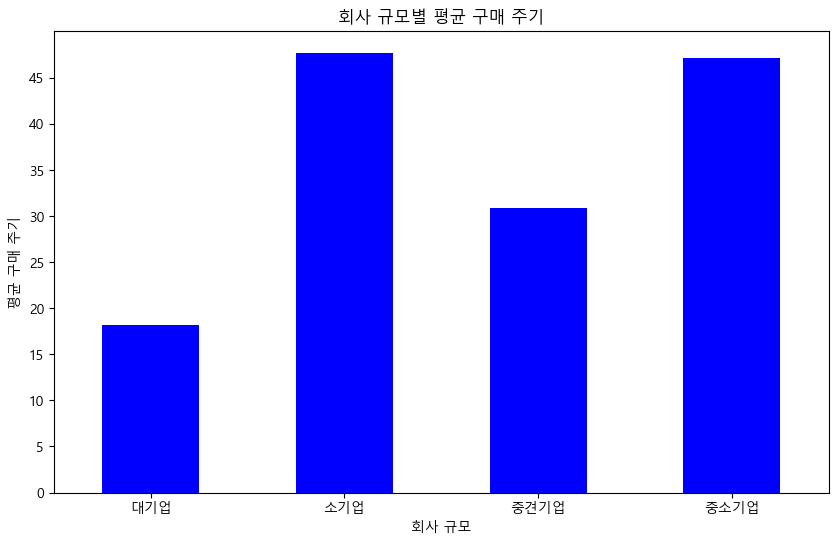

In [74]:
# 회사 규모별 평균 구매 주기 계산
company_scale_cycle = data.groupby('회사 규모')['평균 구매 주기'].mean()

# 막대그래프로 시각화
plt.figure(figsize=(10, 6))
company_scale_cycle.plot(kind='bar', color='blue')
plt.xlabel('회사 규모')
plt.ylabel('평균 구매 주기')
plt.title('회사 규모별 평균 구매 주기')
plt.xticks(rotation=0)
plt.yticks(range(0, int(company_scale_cycle.max()) + 1, 5))  # Y축 눈금을 5 단위로 설정
plt.show()

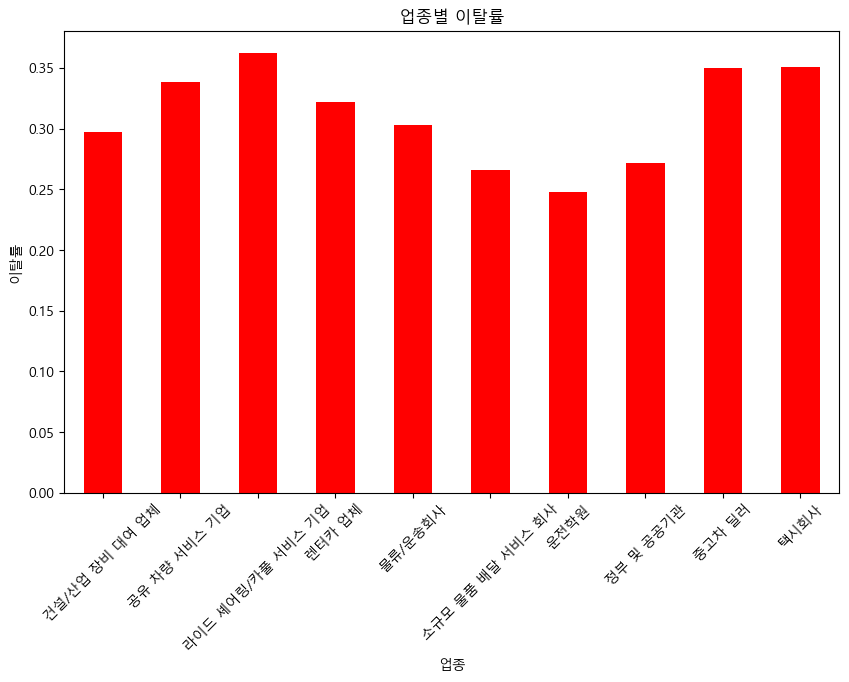

In [78]:
# 업종별 이탈률 계산
industry_churn_rate = data.groupby('업종')['이탈 여부'].mean()

# 막대그래프로 시각화
plt.figure(figsize=(10, 6))
industry_churn_rate.plot(kind='bar', color='red')
plt.xlabel('업종')
plt.ylabel('이탈률')
plt.title('업종별 이탈률')
plt.xticks(rotation=45)
plt.show()


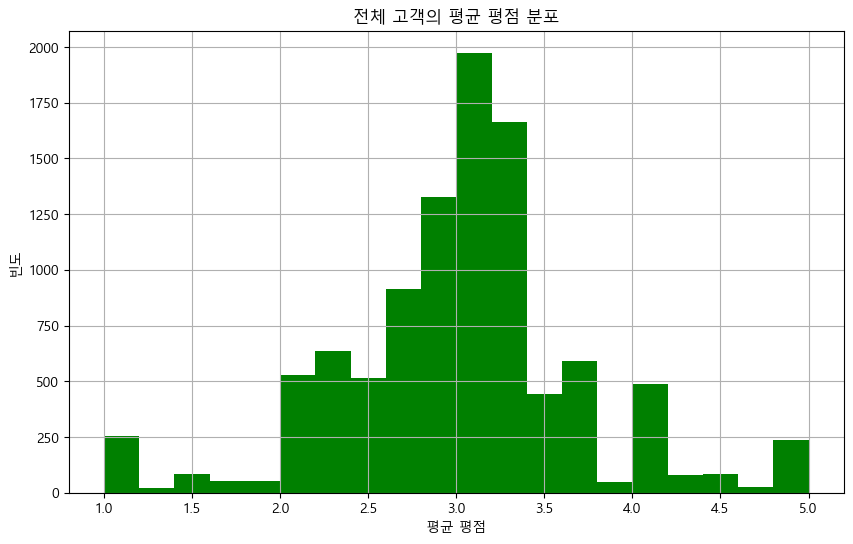

In [80]:
# 히스토그램으로 평균 평점 분포 시각화
plt.figure(figsize=(10, 6))
data['평균 평점'].hist(bins=20, color='green')
plt.xlabel('평균 평점')
plt.ylabel('빈도')
plt.title('전체 고객의 평균 평점 분포')
plt.show()


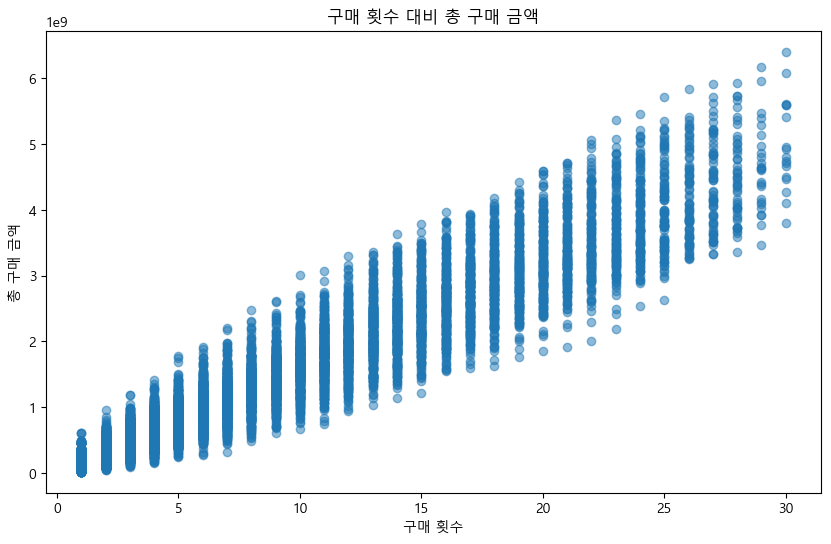

In [111]:
# 산점도로 구매 횟수 대비 총 구매 금액 분석
plt.figure(figsize=(10, 6))
plt.scatter(data['구매 횟수'], data['총 구매 금액'], alpha=0.5)
plt.xlabel('구매 횟수')
plt.ylabel('총 구매 금액')
plt.title('구매 횟수 대비 총 구매 금액')
plt.show() 

그래프는 구매 횟수가 증가함에 따라 총 구매 금액도 증가하는 뚜렷한 양의 상관관계를 보여줍니다.
이는 고객이 더 자주 구매할수록 총 구매 금액이 더 높아지는 일반적인 패턴을 반영합니다.

패턴:

그래프의 데이터 포인트가 계단식으로 정렬되어 있어 구매 횟수와 총 구매 금액 간의 비례 관계가 직관적으로 드러납니다.
이 패턴은 구매 횟수가 많을수록 고객이 더 높은 금액을 소비하는 경향이 있음을 시사합니다.
결론:
고객 분석:
구매 횟수가 많은 고객일수록 높은 총 구매 금액을 기록하므로, 자주 구매하는 고객을 대상으로 하는 전략이 효과적일 수 있습니다.
세분화 필요:
구매 횟수가 동일한 고객 간에도 총 구매 금액에 큰 차이가 있으므로, 고객군을 세분화하여 분석할 필요가 있습니다. 예: 구매 단가가 높은 고객과 낮은 고객을 분리하여 맞춤형 전략 수립.

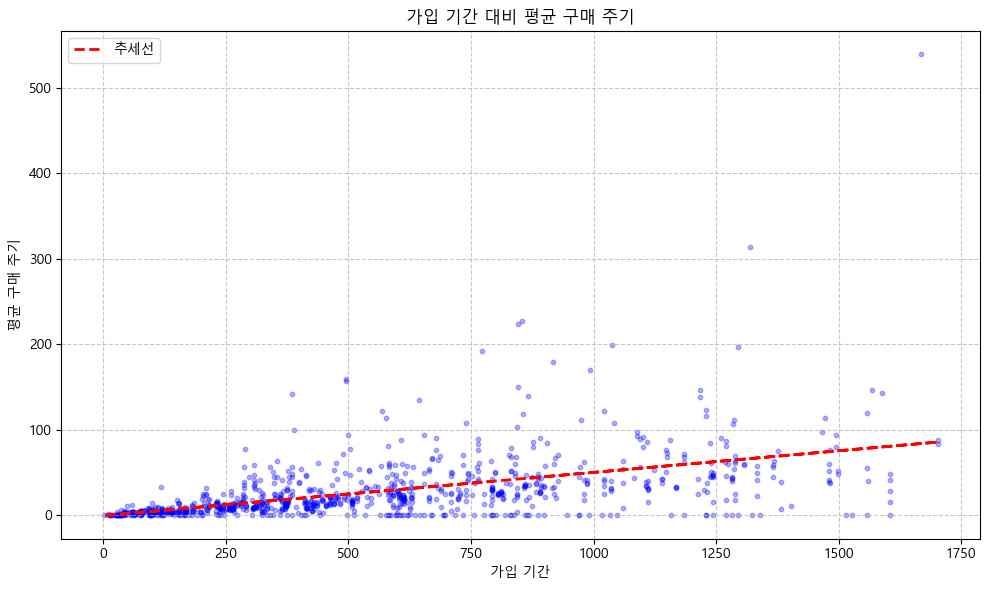

In [116]:
import numpy as np


# 산점도 + 추세선
plt.figure(figsize=(10, 6))

# 데이터 샘플링 (전체 데이터 중 10%만 표시)
sampled_data = data.sample(frac=0.1, random_state=42)

# 산점도
plt.scatter(sampled_data['가입 기간'], sampled_data['평균 구매 주기'], alpha=0.3, s=10, color='blue')

# 추세선 계산 및 추가
z = np.polyfit(data['가입 기간'], data['평균 구매 주기'], 1)
p = np.poly1d(z)
plt.plot(data['가입 기간'], p(data['가입 기간']), "r--", linewidth=2, label="추세선")

# 축과 제목 설정
plt.xlabel('가입 기간')
plt.ylabel('평균 구매 주기')
plt.title('가입 기간 대비 평균 구매 주기')
plt.grid(True, linestyle='--', alpha=0.7)  # 그리드 추가
plt.legend()
plt.tight_layout()  # 레이아웃 조정
plt.show()


가입 기간이 긴 고객은 평균 구매 주기가 길어지는 경향이 있으나, 대부분의 고객은 가입 기간에 관계없이 비교적 일정한 구매 주기를 유지합니다.

가입 기간이 짧은 고객에서는 평균 구매 주기의 분포가 비교적 좁고 일정한 반면, 가입 기간이 길어질수록 평균 구매 주기의 분포가 더 넓어지는 경향이 있습니다.
이는 가입 기간이 늘어날수록 일부 고객이 구매 주기가 크게 늘어날 가능성을 시사합니다.

추세선은 약한 양의 기울기를 가지며, 이는 가입 기간이 길어짐에 따라 평균 구매 주기가 약간 증가하지만, 상관관계가 강하지 않음을 보여줍니다.
평균 구매 주기에 영향을 미치는 다른 요인이 있을 가능성이 있습니다.


<Figure size 1000x600 with 0 Axes>

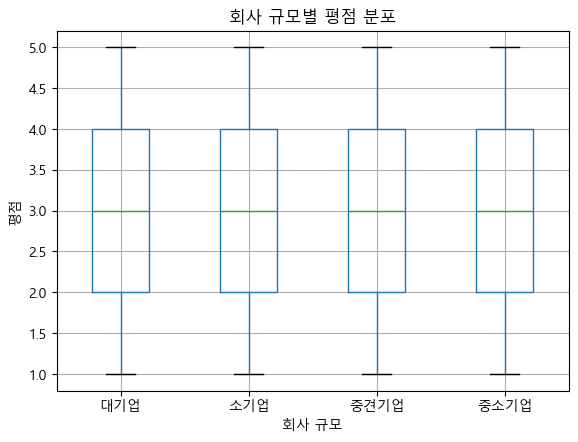

In [86]:
# 상자그래프로 회사 규모별 평점 분포 시각화
plt.figure(figsize=(10, 6))
data.boxplot(column='평점', by='회사 규모')
plt.xlabel('회사 규모')
plt.ylabel('평점')
plt.title('회사 규모별 평점 분포')
plt.suptitle('')
plt.show()


이 그래프는 고객 만족도가 회사 규모에 따라 큰 차이를 보이지 않는다는 결론을 시사합니다.

중앙값(Median):

모든 회사 규모(대기업, 소기업, 중견기업, 중소기업)의 중앙값은 3.0 근처에 위치합니다. 이는 회사 규모와 관계없이 평균 평점이 대체로 중간 수준임을 나타냅니다.
평점 분포 범위:

각 상자 그래프의 상단과 하단은 1분위수(Q1)와 3분위수(Q3)를 나타내며, 대부분의 평점 데이터가 약 2.5에서 4.0 사이에 분포하고 있습니다.
이는 모든 회사 규모에서 고객 평점의 변동이 비슷한 패턴을 따르고 있음을 보여줍니다.
최댓값과 최솟값:

각 회사 규모에서 평점의 최댓값은 5.0, 최솟값은 1.0입니다. 이는 고객 만족도가 전반적으로 최대와 최소값 사이에서 동일하게 나타남을 시사합니다.

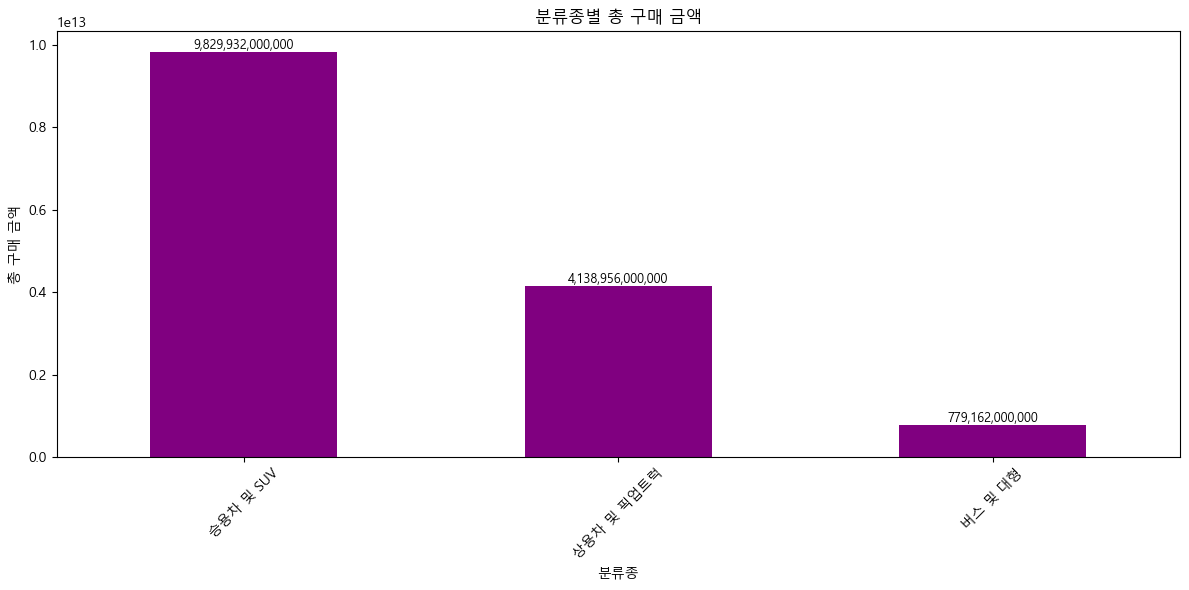

In [107]:

# 분류종별 총 구매 금액 계산
vehicle_type_total = data.groupby('분류종')['총 구매 금액'].sum()

# 막대그래프로 시각화
plt.figure(figsize=(12, 6))
bars = vehicle_type_total.sort_values(ascending=False).plot(kind='bar', color='purple')

# 그래프 옆에 금액 표시
for index, value in enumerate(vehicle_type_total.sort_values(ascending=False)):
    plt.text(index, value, f'{value:,.0f}', ha='center', va='bottom', fontsize=9)

plt.xlabel('분류종')
plt.ylabel('총 구매 금액')
plt.title('분류종별 총 구매 금액')
plt.xticks(rotation=45)
plt.tight_layout()  # 레이아웃 조정
plt.show()

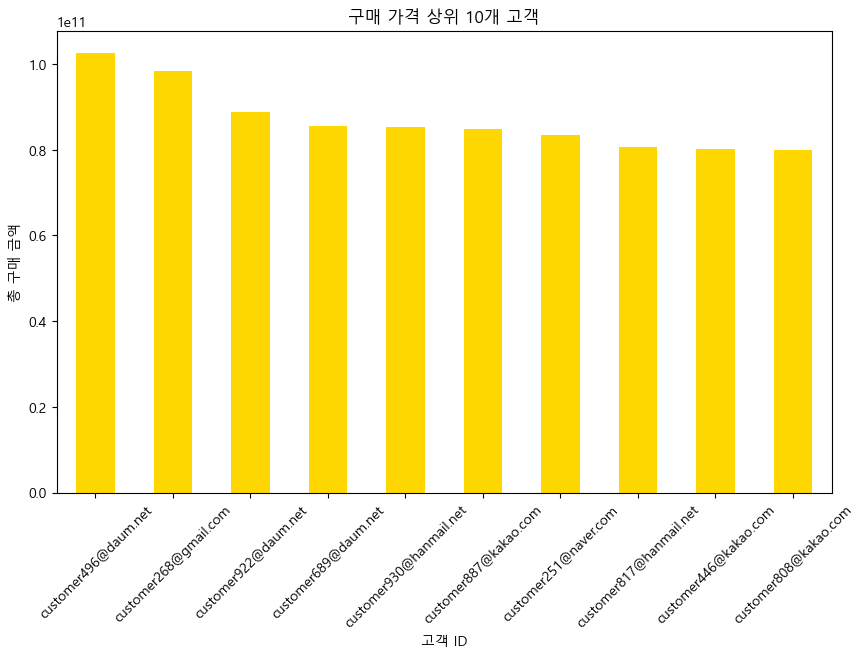

In [90]:
# 구매 가격 상위 10개 고객
top_customers = data.groupby('CustomerID')['총 구매 금액'].sum().nlargest(10)

# 막대그래프로 시각화
plt.figure(figsize=(10, 6))
top_customers.plot(kind='bar', color='gold')
plt.xlabel('고객 ID')
plt.ylabel('총 구매 금액')
plt.title('구매 가격 상위 10개 고객')
plt.xticks(rotation=45)
plt.show()


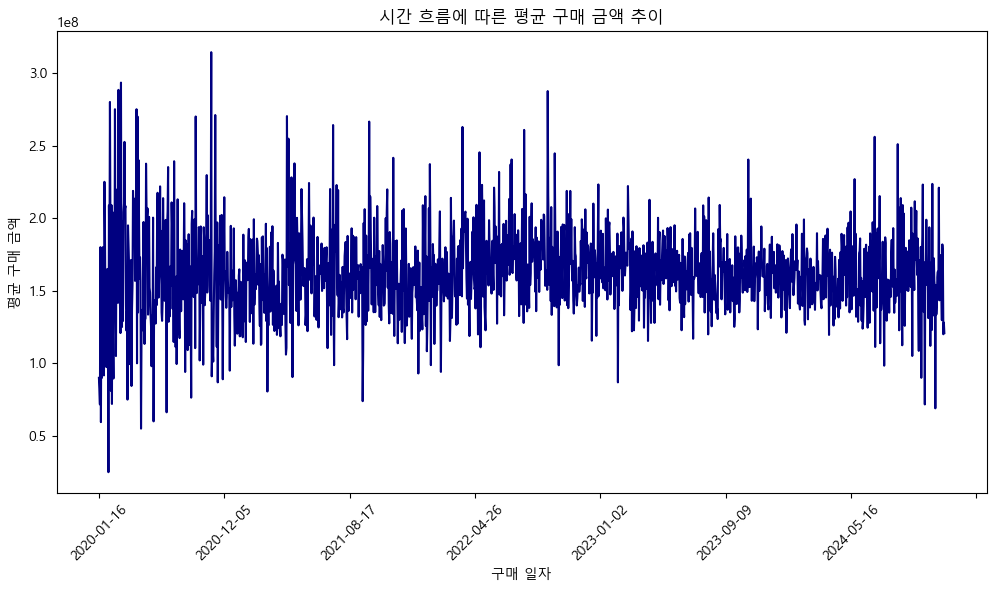

In [102]:
# 시간 흐름에 따른 평균 구매 금액 추이
time_trend = data.groupby('구매 일자')['평균 구매 금액'].mean()

# 선그래프로 시각화
plt.figure(figsize=(12, 6))
time_trend.plot(kind='line', color='navy')
plt.xlabel('구매 일자')
plt.ylabel('평균 구매 금액')
plt.title('시간 흐름에 따른 평균 구매 금액 추이')
plt.xticks(rotation=45)
plt.show() 


장기적인 추세:

그래프의 중심선을 기준으로 볼 때, 평균 구매 금액은 전체적으로 일정한 범위 내에서 변동하며, 특정한 상승 또는 하락의 지속적인 추세는 보이지 않습니다.
이는 고객의 구매 행동이 큰 변화 없이 유지되고 있음을 나타냅니다.

특정 날짜 구간(예: 2020년 초, 2024년 중반)에 평균 구매 금액이 급격히 증가한 시기가 관찰됩니다. 이 구간은 특정한 이벤트나 프로모션 기간과 관련이 있을 수 있습니다.
반대로, 구매 금액이 급격히 줄어든 시기도 존재하며, 이는 비수기나 외부 요인(예: 경제적 불확실성 등)에 기인할 가능성이 있습니다.

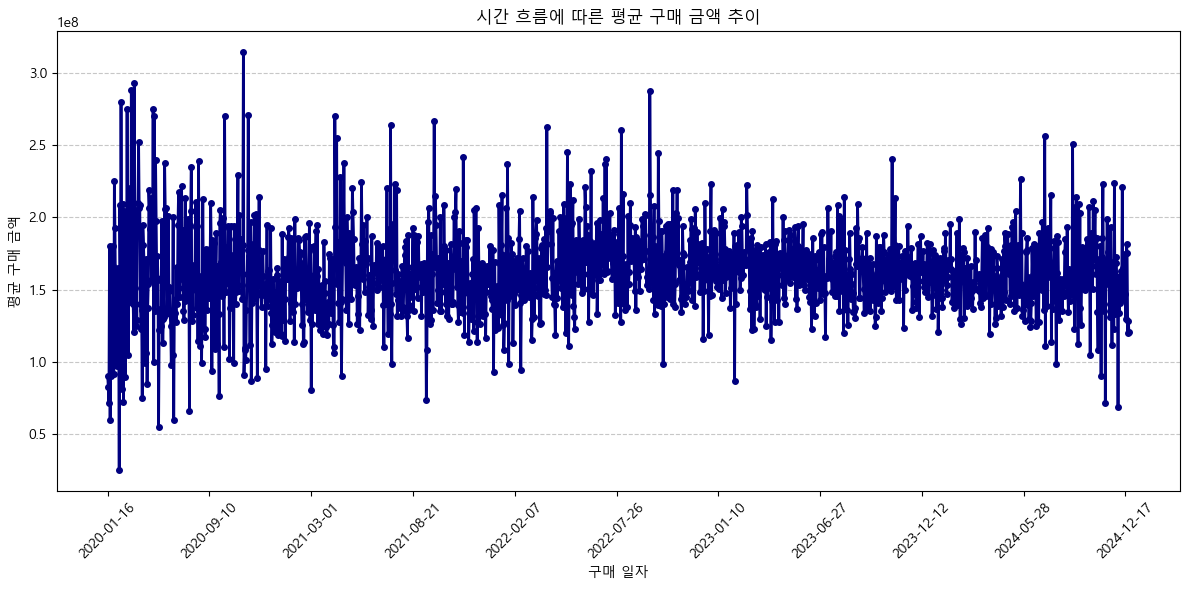

In [100]:
# 시간 흐름에 따른 평균 구매 금액 추이 계산
time_trend = data.groupby('구매 일자')['평균 구매 금액'].mean()

# 선그래프로 시각화
plt.figure(figsize=(12, 6))
plt.plot(time_trend, marker='o', color='navy', linewidth=2, markersize=4)  # 데이터 포인트 강조
plt.xlabel('구매 일자')
plt.ylabel('평균 구매 금액')
plt.title('시간 흐름에 따른 평균 구매 금액 추이')
plt.xticks(range(0, len(time_trend), max(len(time_trend)//10, 1)), rotation=45)  # x축 레이블 간격 조정
plt.grid(axis='y', linestyle='--', alpha=0.7)  # y축에 그리드 추가
plt.tight_layout()  # 레이아웃 조정
plt.show()
